<a href="https://colab.research.google.com/github/ellenrpaes/Data_Science_Projects/blob/master/Telecom_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="100%" src="https://www.sogeti.com/link/d677f3cd362b4884bcbfab952931bbce.aspx">

# **Customer churn prediction in telecom**
*by [Ellen Paes](https://www.linkedin.com/in/ellenpaes/)*  

---

*Churn rate*, or *churn*, is a term to describe the rate at which customer leave or cancel some product or service. This is one of the most important metrics for a business because it usually costs more to acquire a new customers than to retain existing ones.

Another interesting point to business observation refers to the potential of this kind of analysis that can provide an understanding of problems and what must need to be solved to retain customers.

Keep in mind: An good exploratory analysis can provide us interesting insights!

*   What is the person's profile that cancels our service? (Gender? Married? Kids?)
*   What kind of services can indicate more cancellations?
*   Could people with different kinds of payment methods be retained easily?
*   What kind of service I can suggest retaining my customer?

Try to answer business questions before predict models. After that, we can apply some prediction to avoid churn e provide to our company a end-to-end understandig since de exploratory analysis until modeling a machine learning techniques!

In this script, we will step through a simple approach to building an effective exploratory analysis, data preparation, train, tune and evaluate some machine learning models. 


In [1]:
# install package
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [2]:
# importing warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# random seed
np.random.seed(42)

# Importing Data

The data used in this project were originally made available on the [IBM Developer teaching platform](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), and deal with a typical problem for a telecommunications company. The full dataset can be found at this [link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).
Although there is no explicit information available, the column names allow an understanding of the problem.

In [3]:
# importing data
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# check first 5 entries
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Dictionary

The customer churn data for a hypothetical telecommunication company has the following attributes:

* customerID - Custumer unique identifier
* gender - Customer gender - ['Female' 'Male']
* SeniorCitizen - Elderly or retired person, a senior citizen is someone who has at least attained the age of 60 of 65 years
* Partner - - ['No' 'Yes']
* Dependents - If customer has dependents - ['No' 'Yes']
* Tenure - Customer lifespan (in months)
* PhoneService - - ['No' 'Yes']
* MultipleLines - - ['No' 'No phone service' 'Yes']
* InternetService - - ['No' 'No internet service' 'Yes']
* OnlineSecurity - - ['No' 'No internet service' 'Yes']
* OnlineBackup - - ['No' 'No internet service' 'Yes']
* DeviceProtection - - ['No' 'No internet service' 'Yes']
* TechSupport - - ['No' 'No internet service' 'Yes']
* StreamingTV - - ['No' 'No internet service' 'Yes']
* StreamingMovies - - ['No' 'No internet service' 'Yes']
* Contract - Type of contract - ['Month-to-month' 'One year' 'Two year']
* PaperlessBilling - - ['No' 'Yes']
* PaymentMethod - payment method - ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
* MonthlyCharges - Monthly Recurring Charges
* TotalCharges - Life time value
* Churn - Churn value, the targer vector - ['No' 'Yes']

# Exploratory Analysis

To begin our exploratory analysis, we need to examine the data distribution, outliers and anomalies of our data. This is an important part of any analytical strategy and will help us to understandig our data better.

In [4]:
# know the size of the imported dataset

print('Dataset dimensions ')
print('Entries:\t{}'.format(df.shape[0]))
print('Attributes:\t{}'.format(df.shape[1]))


Dataset dimensions 
Entries:	7043
Attributes:	21


### Features and data types

The feature TotalCharges got read by Pandas as object data type. This have impacts during the exploratory analysis and have to be handled. We will convert datatype to float64 in the coming sections.

In [5]:
# Checking the data types of all the columns
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

## Checking missing values

Before checking the missing values, we are going to replace all the blank spaces ocurreces that this dataset might have.

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
# Verify missing data
print(f"Missing data in the column TotalCharges was {df['TotalCharges'].isnull().sum()} values.")


Missing data in the column TotalCharges was 11 values.


In [8]:
# filling missing data with median
TotalChargesMedian = df.TotalCharges.median()
df["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

In [9]:
# Verify missing data
print(f"Missing data in the column TotalCharges was {df['TotalCharges'].isnull().sum()} values.")

Missing data in the column TotalCharges was 0 values.


In [10]:
# Identify the percentage of missing values ​​of the variables in descending order
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Churn               0.0
OnlineSecurity      0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineBackup        0.0
TotalCharges        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
customerID          0.0
dtype: float64

In [11]:
# Check the column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

By checking feature's unique values we can see that the column customerID have unique identifiers for each customer, which confirms that each row represents a single customer. This feature does not contribute for this analysis, therefore we are going to drop the column.

In [12]:
print("Unique values (per feature): \n{}\n".format(df.nunique()))

Unique values (per feature): 
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64



The variable 'SeniorCitizen' is binary, so we will convert as object.

In [13]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

With the code below we can see fast some relevant information as:

*   **84%** of the clients have/ had less than 60 years old or retired person.
*   **70%** of the clientes doesn't have/ didn't had Dependents.
*   **90%** of the clientes doesn't have/ didn't had a service classified as PhoneService
*   **55%** of the clients have/ had a month-to-month contract.
*   **59%** of the clientes have/ had a paperlessbilling.


In [14]:
# statistic summary about categorical variables
df.describe(include='O')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,5122-CYFXA,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [15]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


The Box Plot provides information on the following characteristics of the dataset: location, dispersion, asymmetry, tail length and outliers. Looks below how to interpret it. 

<img alt="Colaboratory logo" width="100%" src="https://mk0codingwithmaxskac.kinstacdn.com/wp-content/uploads/2019/11/box-plot-vertical-horizontal-1.png">


**Summary Report about boxplot results:**

*   `MonthlyCharges` : Clients with churn pays, in median, **23%** more than other clients.
*    `TotalCharges` has outliers in the churn group. The 'TotalCharges' inside this group is less than the other group because **75%** of them cancel the service in until 30 months as we can see in the `Tenure - Customer lifespan (in months)`.



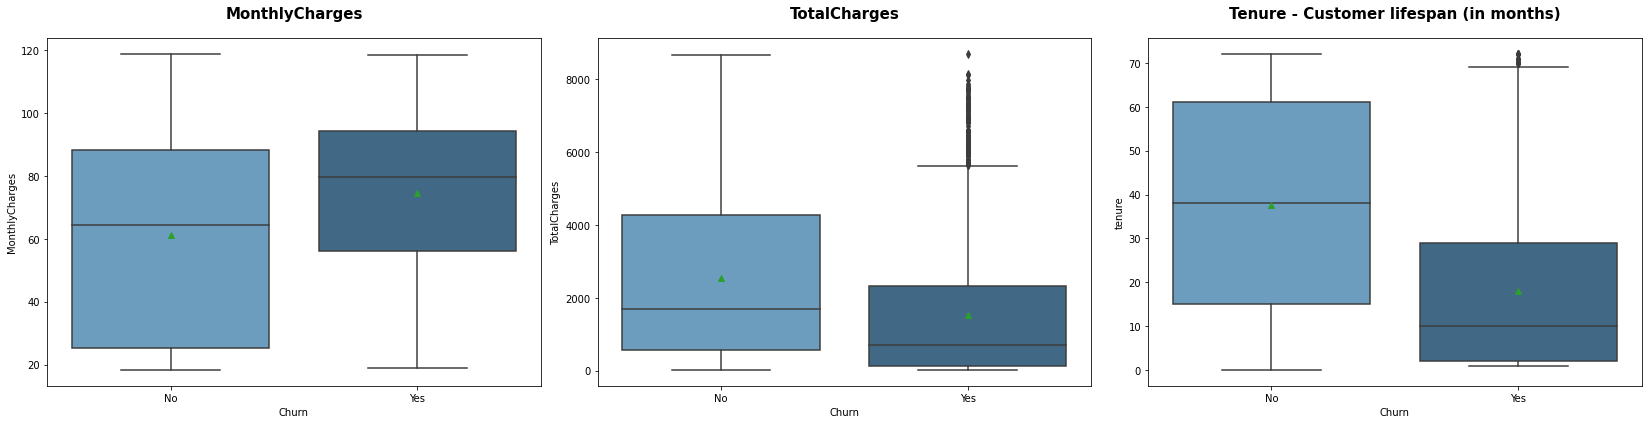

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(23, 6))

sns.boxplot(df.Churn, df.MonthlyCharges, showmeans=True, ax=ax[0], palette="Blues_d")
ax[0].set_title('MonthlyCharges',fontsize=15, fontweight='bold',pad=20)

sns.boxplot(df.Churn, df.TotalCharges, showmeans=True, ax=ax[1],palette="Blues_d")
ax[1].set_title('TotalCharges',fontsize=15, fontweight='bold',pad=20)

sns.boxplot(df.Churn, df.tenure, showmeans=True, ax=ax[2],palette="Blues_d")
ax[2].set_title('Tenure - Customer lifespan (in months)',fontsize=15, fontweight='bold',pad=20)


plt.tight_layout()

We can observe that **26.5%** of the clients cancell the services. Lets know more about them! :)

No     5174
Yes    1869
Name: Churn, dtype: int64

Churn Represents 26.54% Do Dataset.



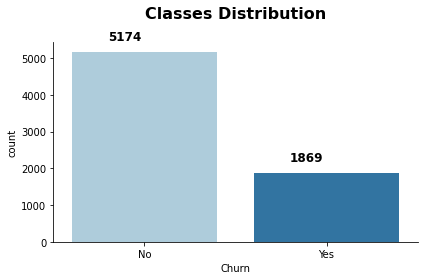

In [17]:
# checando a distribuição da variável alvo
print(df.Churn.value_counts())
print("\nChurn Represents {:.2f}% Do Dataset.\n".format((df[df.Churn == 'Yes'].shape[0] / df.shape[0]) * 100))

# plotando gráfico de barras
fig, ax = plt.subplots()
sns.countplot('Churn', data=df, ax=ax, palette='Paired')
ax.set_title('Classes Distribution', fontsize=16, fontweight='bold',pad=24)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

sns.despine(fig)
plt.tight_layout()
plt.show()

## **Understanding the profile of churn customers**

The main goal of this experiment is to identify patterns that can yield to customers churn. Let's focus on the churn portion (**1869 clients**) of the dataset for the exploratory analysis.

**1. Summary Report about Personal Attributes:**

Let's review which personal charactiristic contribute mostly for the cancellation decision. 

*Items included: `Gender`, `Dependents`, `Partner`, `SeniorCitizen`*

*   **No relevant** insights for gender (49.7% Male and 50.3% Female)
*   **82%** of the clients that cancel the service didn't have dependents. Customers without dependents are 4.7 times more likely to churn.
*   **74%** of the clients didn't are Senior Citizens. Senior citizens are 2.9 times less likely to churn.
*   **64%** of the clients didn't have partners. Clients with partners are almost 1.7 times less likely to churn.





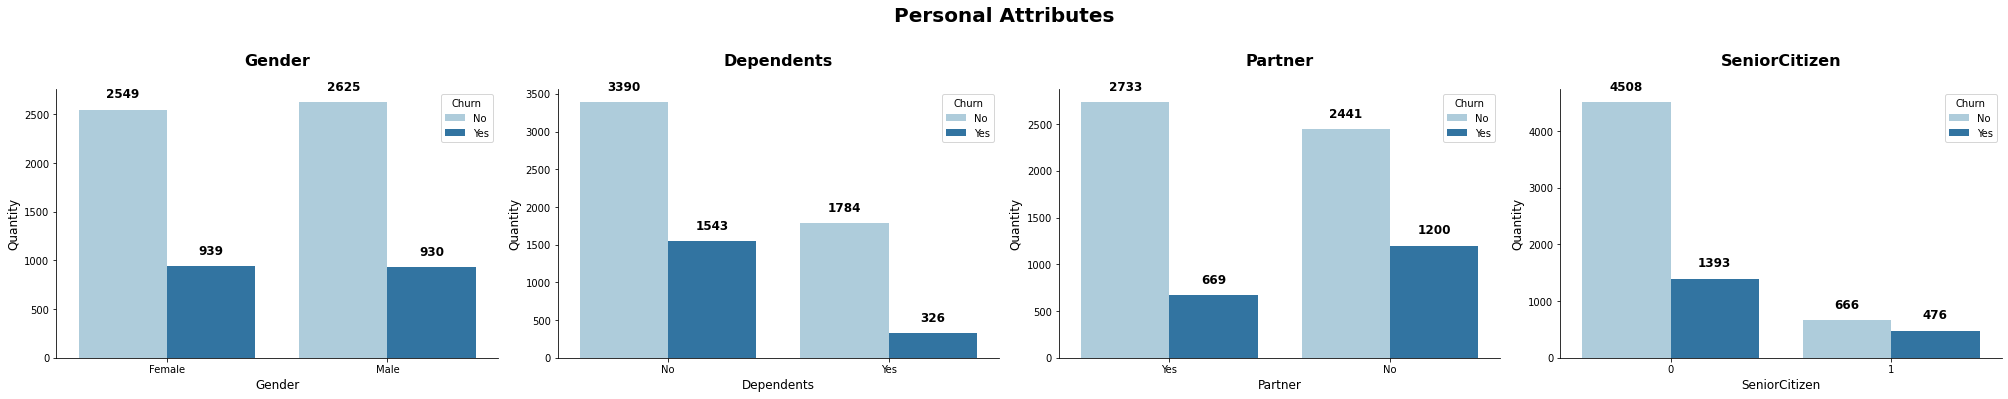

In [18]:
### Personal Attributes

f, axes = plt.subplots(1, 4,figsize=(28, 5))
f.suptitle('Personal Attributes',fontsize=20,fontweight='bold',y=1.1)

ax = sns.countplot(x="gender", hue="Churn", data=df, ax=axes[0], palette='Paired')
ax.set_title('Gender', fontsize=16, fontweight='bold',pad=24)
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Quantity', fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

ax1 = sns.countplot(x="Dependents", hue="Churn", data=df, ax=axes[1], palette='Paired')
ax1.set_title('Dependents', fontsize=16, fontweight='bold',pad=24)
ax1.set_xlabel('Dependents', fontsize=12)
ax1.set_ylabel('Quantity', fontsize=12)
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center',xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

ax2 = sns.countplot(x="Partner", hue="Churn", data=df, ax=axes[2], palette='Paired')
ax2.set_title('Partner', fontsize=16, fontweight='bold',pad=24)
ax2.set_xlabel('Partner', fontsize=12)
ax2.set_ylabel('Quantity', fontsize=12)
for p in ax2.patches:
    ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center',xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

ax3 = sns.countplot(x="SeniorCitizen", hue="Churn", data=df, ax=axes[3], palette='Paired')
ax3.set_title('SeniorCitizen', fontsize=16, fontweight='bold',pad=24)
ax3.set_xlabel('SeniorCitizen', fontsize=12)
ax3.set_ylabel('Quantity', fontsize=12)
for p in ax3.patches:
    ax3.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center',xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

sns.despine(f)
plt.tight_layout()
plt.show()

**2. Summary Report about Services Attributes:**

Let's review which services charactiristic contributes mostly for the cancellation decision. It gives insights regarding which kind of carrier services the customers that are more likely to cancel:

*Items included: `PhoneService`, `OnlineBackup`, `MultipleLines`, `InternetService`, `OnlineSecurity`*.

*   **91%** of the clients had a PhoneService enabled. 
*   **66%** of the clients didn't had a OnlineBackup.
*   **69%** of the clients had Fiber Optic as internet service.
*   **78%** of the clients didn't had a OnlineSecurity.

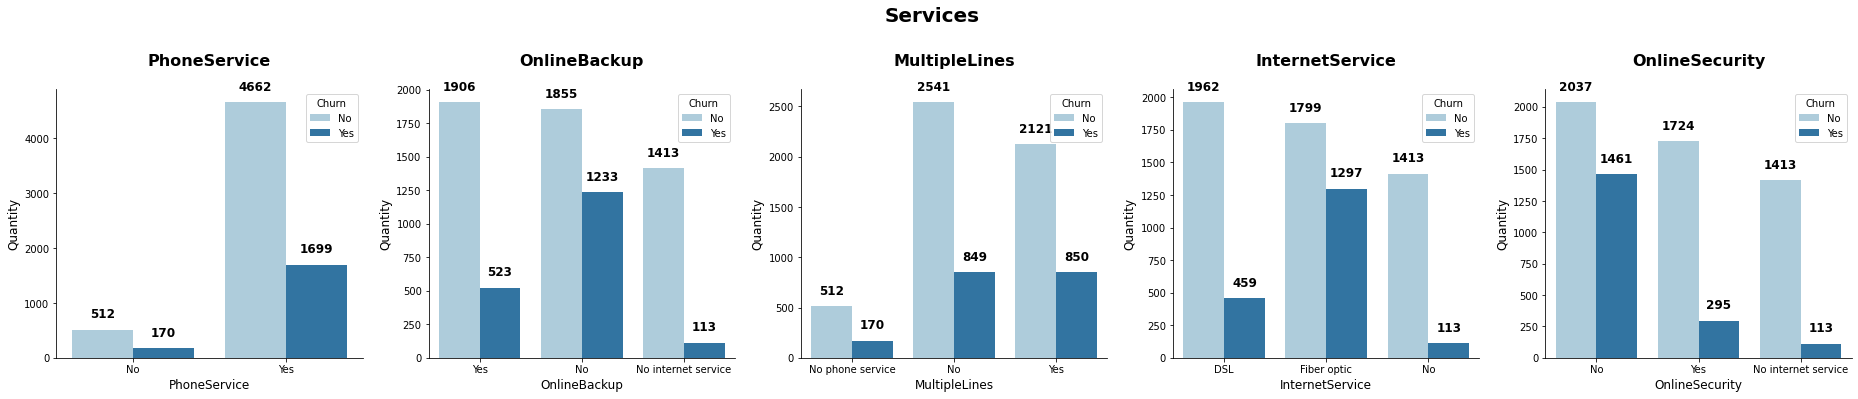

In [19]:
f, axes = plt.subplots(1, 5,figsize=(26, 5))
f.suptitle('Services',fontsize=20,fontweight='bold',y=1.1)

ax1 = sns.countplot(x="PhoneService", hue="Churn", data=df, ax=axes[0], palette='Paired')
ax1.set_title('PhoneService', fontsize=16, fontweight='bold',pad=24)
ax1.set_xlabel('PhoneService', fontsize=12)
ax1.set_ylabel('Quantity', fontsize=12)
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

ax2 = sns.countplot(x="OnlineBackup", hue="Churn", data=df, ax=axes[1], palette='Paired')
ax2.set_title('OnlineBackup', fontsize=16, fontweight='bold',pad=24)
ax2.set_xlabel('OnlineBackup', fontsize=12)
ax2.set_ylabel('Quantity', fontsize=12)
for p in ax2.patches:
    ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center',xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

ax3 = sns.countplot(x="MultipleLines", hue="Churn", data=df, ax=axes[2], palette='Paired')
ax3.set_title('MultipleLines', fontsize=16, fontweight='bold',pad=24)
ax3.set_xlabel('MultipleLines', fontsize=12)
ax3.set_ylabel('Quantity', fontsize=12)
for p in ax3.patches:
    ax3.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center',xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

ax4 = sns.countplot(x="InternetService", hue="Churn", data=df, ax=axes[3], palette='Paired')
ax4.set_title('InternetService', fontsize=16, fontweight='bold',pad=24)
ax4.set_xlabel('InternetService', fontsize=12)
ax4.set_ylabel('Quantity', fontsize=12)
for p in ax4.patches:
    ax4.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center',xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

ax5 = sns.countplot(x="OnlineSecurity", hue="Churn", data=df, ax=axes[4], palette='Paired')
ax5.set_title('OnlineSecurity', fontsize=16, fontweight='bold',pad=24)
ax5.set_xlabel('OnlineSecurity', fontsize=12)
ax5.set_ylabel('Quantity', fontsize=12)
for p in ax5.patches:
    ax5.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

sns.despine(f)
plt.tight_layout()
plt.show()

**2. Summary Report about Services Attributes:**

Continuing the review which services characteristic contributes mostly to the cancellation decision. It gives insights regarding which kind of carrier services the customers that are more likely to cancel:

*Items included: `TechSupport`, `StreamingTV`, `StreamingMovies`, `DeviceProtection`*.

*   **77%** of the clients didn't had a TechSupport. 
*   **65%** of the clients didn't had a DeviceProtection.

About services attributes, in general, clients that do not have Online Security, Device Protection, Online Backup, and Tech Support services enabled are more likely to leave.


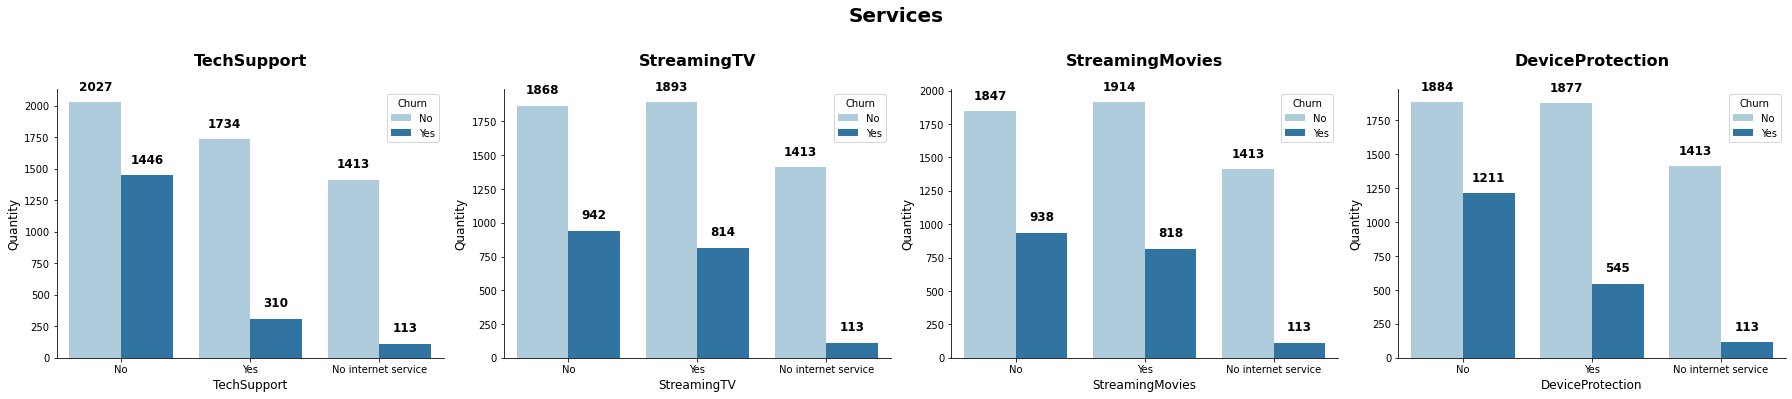

In [20]:
f, axes = plt.subplots(nrows=1, ncols=4,figsize=(25, 5))
f.suptitle('Services',fontsize=20,fontweight='bold',y=1.1)

ax = sns.countplot(x="TechSupport", hue="Churn", data=df, ax=axes[0], palette='Paired')
ax.set_title('TechSupport', fontsize=16, fontweight='bold',pad=24)
ax.set_xlabel('TechSupport', fontsize=12)
ax.set_ylabel('Quantity', fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

ax1 = sns.countplot(x="StreamingTV", hue="Churn", data=df, ax=axes[1], palette='Paired')
ax1.set_title('StreamingTV', fontsize=16, fontweight='bold',pad=24)
ax1.set_xlabel('StreamingTV', fontsize=12)
ax1.set_ylabel('Quantity', fontsize=12)
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center',xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

ax2 = sns.countplot(x="StreamingMovies", hue="Churn", data=df, ax=axes[2], palette='Paired')
ax2.set_title('StreamingMovies', fontsize=16, fontweight='bold',pad=24)
ax2.set_xlabel('StreamingMovies', fontsize=12)
ax2.set_ylabel('Quantity', fontsize=12)
for p in ax2.patches:
    ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center',xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

ax3 = sns.countplot(x="DeviceProtection", hue="Churn", data=df, ax=axes[3], palette='Paired')
ax3.set_title('DeviceProtection', fontsize=16, fontweight='bold',pad=24)
ax3.set_xlabel('DeviceProtection', fontsize=12)
ax3.set_ylabel('Quantity', fontsize=12)
for p in ax3.patches:
    ax3.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center',xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

sns.despine(f)
plt.tight_layout()
plt.show()

**3. Summary Report about Contract:**

Let's review which contract charactiristic contributes mostly for the cancellation decision.

*Items included: `PaperlessBilling`, `PaymentMethod` and `PaperlessBilling`*.

*   **75%** of the clients had a Paperless Billing enabled. 
*   **57%** of the clients had payment method as Eletronic Check.
*   **88%** of the clients had a month-to-month contract type.
   

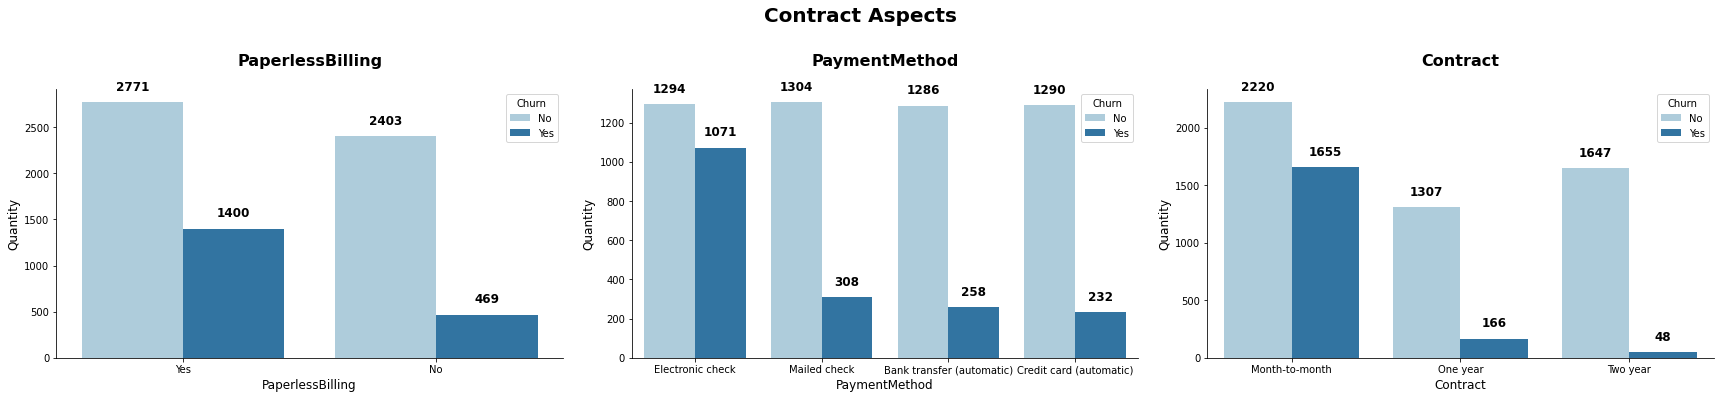

In [21]:
f, axes = plt.subplots(1, 3,figsize=(24, 5))
f.suptitle('Contract Aspects',fontsize=20,fontweight='bold',y=1.1)

ax1 = sns.countplot(x="PaperlessBilling", hue="Churn", data=df, ax=axes[0], palette='Paired')
ax1.set_title('PaperlessBilling', fontsize=16, fontweight='bold',pad=24)
ax1.set_xlabel('PaperlessBilling', fontsize=12)
ax1.set_ylabel('Quantity', fontsize=12)
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

ax2 = sns.countplot(x="PaymentMethod", hue="Churn", data=df, ax=axes[1], palette='Paired')
ax2.set_title('PaymentMethod', fontsize=16, fontweight='bold',pad=24)
ax2.set_xlabel('PaymentMethod', fontsize=12)
ax2.set_ylabel('Quantity', fontsize=12)
for p in ax2.patches:
    ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center',xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

ax3 = sns.countplot(x="Contract", hue="Churn", data=df, ax=axes[2], palette='Paired')
ax3.set_title('Contract', fontsize=16, fontweight='bold',pad=24)
ax3.set_xlabel('Contract', fontsize=12)
ax3.set_ylabel('Quantity', fontsize=12)
for p in ax3.patches:
    ax3.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center',xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

sns.despine(f)
plt.tight_layout()
plt.show()

**4. Summary Report about customer lifespan:**

The column tenure represents the amount of time that a customer maintains inside the business, meaning that a high tenure represents high customer fidelity. 

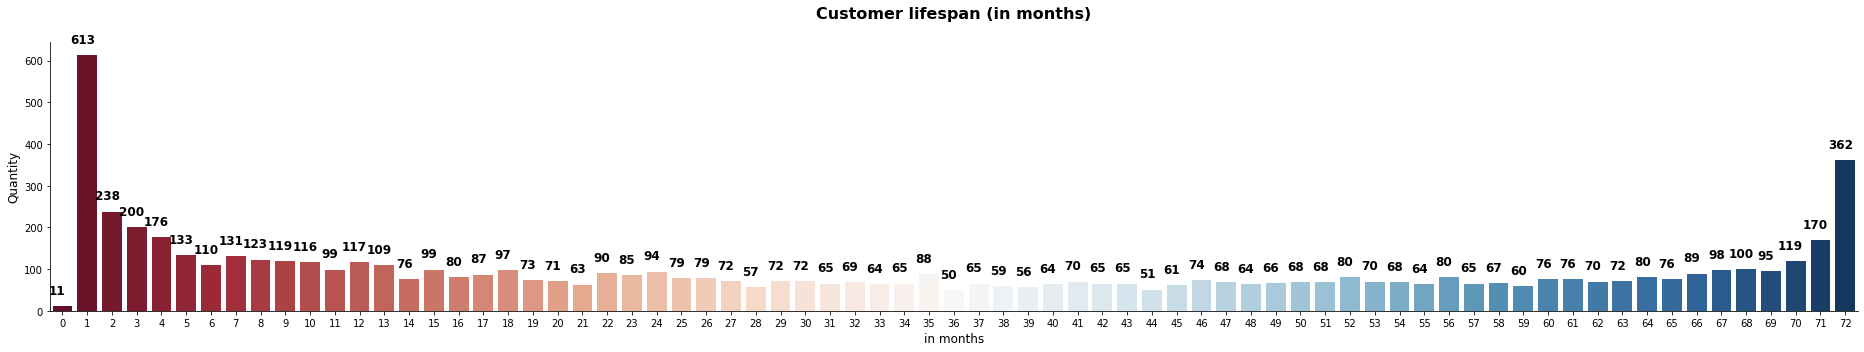

In [22]:
# plotting countplot for tenure
f,ax = plt.subplots(figsize=(26,5))
ax = sns.countplot(df['tenure'], ax=ax, palette='RdBu')
ax.set_title('Customer lifespan (in months)', fontsize=16, fontweight='bold',pad=24)
ax.set_xlabel('in months', fontsize=12)
ax.set_ylabel('Quantity', fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center',xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

sns.despine(f)
plt.tight_layout()
plt.show()

**How long is the customer lifespan until subscription cancellation?**

*    **20%** of the clients leave on the first month.
*    **32%** of the clients leave on until the third month.
*    **42%** - almost a half! - of the clients leave on until the sixth month.

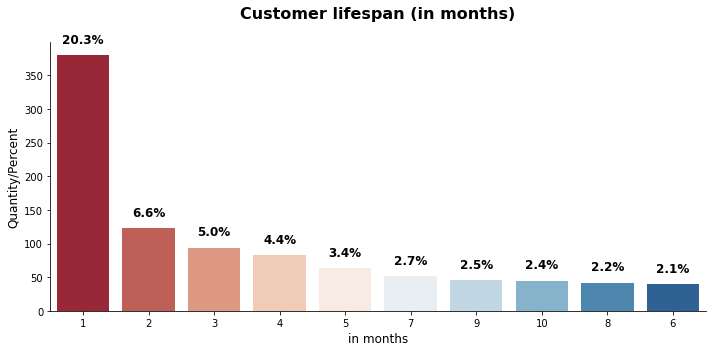

In [23]:
# creating variables to calculate the percentage
df_top_churn = pd.DataFrame(df[df['Churn'] == 'Yes']['tenure'].value_counts().sort_values(ascending=False))
total_churn = df[df['Churn'] == 'Yes'].shape[0]

f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot( x = df_top_churn[:10].index, y = df_top_churn[:10].tenure, ax=ax, palette='RdBu', order=df_top_churn[:10].index)
ax.set_title('Customer lifespan (in months)', fontsize=16, fontweight='bold',pad=24)
ax.set_xlabel('in months', fontsize=12)
ax.set_ylabel('Quantity/Percent', fontsize=12)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_churn)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center',xytext = (0, 12), textcoords = 'offset points', fontsize=12, fontweight='bold')

sns.despine(f)
plt.tight_layout()
plt.show()

# **Data Preparation**

## **Feature Engineering**

Feature engineering is an important step to treat, reformatted, enrich and calibrated data to be useful to machine learning models because ML algorithms can only read numerical values. An important step of data preparation is to apply the encoding of categorical features into numerical values. In our data, we had some categorical features with binary classes, such as `Gender`,`SeniorCitizen`,`Partner`,`Dependents`,`PhoneServices` and `PaperlessBilling`. For them we can use `le = LabelEncoder()` from Scikit-Learn to normalize labels.

For categorical classes with more than two classes, `MultipleLines`, `InternetService` , `OnlineSecurity` , `OnlineBackup` , `DeviceProtection` , `TechSupport`, `StreamingTV` , `StreamingMovies` , `Contract` and `PaymentMethod` we can use `pd.get_dummies()` from Pandas to convert these classes into a dummy/indicator variable.

In [24]:
# criando cópia do dataset
df_clean = df.copy()

# remover coluna costumerID
df_clean = df_clean.drop(['customerID'], axis=1)

# pré processar as variáveis
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

# criar uma cópia do dataframe
df_proc = df_clean.copy()

# Label Encoding para as variáveis Binárias
le = LabelEncoder()
for i in binary_var:
    df_proc[i] = le.fit_transform(df_proc[i])

# Encoding para colunas categóricas com múltiplas classes
df_proc = pd.get_dummies(df_proc, columns=cat_var)

# ver as 5 primeiras entradas do novo dataframe
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


After processing the steps before, we can begin our machine learning model. 
To compare performance and model improvement, we create a simple baseline. In this step, no hyperparameters adjust or data balance will be done, for example.


## **Split train and test data**

Before proceeding with balance data, is an important step now to split data into two parts: **training dataset** and **test dataset**, without this we don't have parameters to check if the balance was correct. The **test dataset** will be useful only in the last step of the project to give us a better evaluation of the results. This test dataset is the final dataset that we use to measure model performance based on some metrics. To guarantee that our training and test dataset have the same amount of classes, proportionally, we use `stratify=y`.

* **Unbalanced dataset**

In [25]:
# split x and y variables
X = df_proc.drop(['Churn'], axis=1)
y = df_proc['Churn']

# split dataset between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

We will use cross-validation to estimate the baseline error and the initial model. To help us, we will create a `var_model` function and define `Recall` as our evaluation metric. For the churn problem, it is the ideal metric to be used. The recall answers question as to what proportion of actual positives was identified correctly? This metric can measure the percentage of churns that were correctly classified related to the total churns, which is what we are looking for to analyze the performance of ML classifiers.

In [26]:
def val_model(X, y, clf, quite=False):
    """
    Make cross-validation for a given model

    # Arguments
      X: DataFrame, feature matrix
      y: Series, target vector
      clf: classifier from scikit-learn
      quite: bool, indicate if funcion should print the results

    # Returns
      float, validation scores
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

For the initial baseline, we will use Random Forest, without any parameter changes. The data used is the training data.

In [27]:
# Create an inicial baseline
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.49 (+/- 0.03)


**Balancing and Standardizing the data**

Remember, the balance must happen only with the training data. The test data must remain untouched.

1    1402
0    1402
dtype: int64


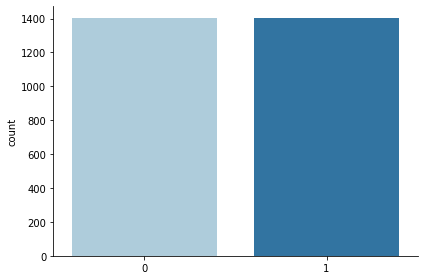

In [28]:
# Standardizing the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# # under sampling
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

# make sure the number of classes are equal distibuted
print(pd.Series(y_train_rus).value_counts())

# plot new distribution
sns.countplot(y_train_rus, palette='Paired')
sns.despine()
plt.tight_layout()
plt.show()

#**Machine Learning Model**

## **Instanciate Models**

Create a baseline using cross-validation with a training dataset. Will be used in this project the algorithms before:

* Random Forest
* Decision Tree
* Stochastic Gradient Descent
* SVC
* Regressão Logística
* LightGBM

After the script, we can see an intuitive table with the Recall results for each one. We will define which model is better to achieve the requirements to solve this problem.

After our data preparation, a deep exploratory analysis we will instaciate models and train with `X_rus` e `y_rus` data. Subsequently, we will make predictions with testing data.

In [29]:
# instaciate models
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
recall = []
# Measure Recall 
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_rus, y_train_rus, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RandomForestClassifier,0.761790
DecisionTreeClassifier,0.691174
SGDClassifier,0.751769
SVC,0.783882
LogisticRegression,0.790305
XGBClassifier,0.793193
LGBMClassifier,0.765333


Because of the characteristics of the problem and the performance during the previous executions, I choose XGBoost, Logistic Regression, and SVM to tunning parameters.

In my opinion, **Tuning Models** can further improve the qualities of those models.

## **Hyperparameters Optimization**

### **XGBoost**


XGBoost has numerous parameters. Someone affects the quality of the model more, others less. A good practice is to define a learning rate and a number of estimators, to perform tuning of other parameters, and, in the end, to check other learning rates.

Following, we will adjust each parameter step-by-step to help our understanding.

As can be seen below it presented a slight improvement after tuned, incresing Recall from **0.79** to **0.89**.

In [30]:
# get params
print(xgb.get_params().keys())

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])


In [31]:
xgb = XGBClassifier() 

param_grid = {
 'n_estimators':range(0,1000,50),
}

# Checking for the best parameter
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# Checking for results
print("Best Recall: {} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best Recall: 0.8031458966565349 for {'n_estimators': 50}


In [32]:
xgb = XGBClassifier(n_estimators=50) 

param_grid = {
 'max_depth': [1,8,1],
 'min_child_weight':[1,5,1],
}

# Checking for the best parameter
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# Checking for results
print("Best Recall: {} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best Recall: 0.8195390070921986 for {'max_depth': 1, 'min_child_weight': 1}


In [33]:
xgb = XGBClassifier(n_estimators=50, min_child_weight=1, max_depth=1) 

param_grid = {
  "learning_rate": [0.001, 0.01, 0.1, 1],
}

# Checking for the best parameter
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# Checking for results
print("Best Recall: {} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best Recall: 0.8851570415400204 for {'learning_rate': 0.001}


After adjusting parameters, we will train the model with the complete training dataset and check the final performance with this "new data" that was preserved.

              precision    recall  f1-score   support

           0       0.93      0.57      0.71      1294
           1       0.43      0.89      0.58       467

    accuracy                           0.66      1761
   macro avg       0.68      0.73      0.64      1761
weighted avg       0.80      0.66      0.67      1761

AUC: 0.7292



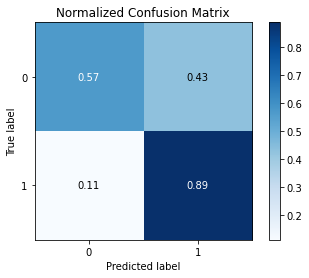

In [34]:
# final model
model_xgb = XGBClassifier(learning_rate=0.001 , n_estimators=50, max_depth=1, min_child_weight=1)
model_xgb.fit(X_train_rus, y_train_rus)

# making prediction
X_test = scaler.transform(X_test)
y_pred_model_xgb = model_xgb.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred_model_xgb))

# Printing AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_model_xgb)))

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_model_xgb, normalize=True)
plt.show()

### **Logistic Regression**

 As can be seen below it presented a slight improvement after tuned, incresing Recall from **0.79** to **0.85**.

In [35]:
# get params
print(lr.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [36]:
lr = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] 
}

# Checking for the best parameter
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(lr, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# Checking for results
print("Best Recall: {} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best Recall: 0.8052684903748734 for {'C': 0.001}


In [37]:
lr = LogisticRegression(C=0.001)

param_grid = {"solver": ["newton-cg", "lbfgs", "liblinear",'sag','saga'] 
}

# Checking for the best parameter
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(lr, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# Checking for results
print("Best Recall: {} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best Recall: 0.8394782168186422 for {'solver': 'liblinear'}


In [38]:
lr = LogisticRegression(C=0.001, solver='liblinear')

param_grid = {"penalty": ["l1", "l2", "elasticnet", "none"] 
}

# Checking for the best parameter
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(lr, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# Checking for results
print("Best Recall: {} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best Recall: 0.843095238095238 for {'penalty': 'l2'}


In [39]:
lr = LogisticRegression(C=0.001, solver='liblinear', penalty='l2')

param_grid = {
    'multi_class': ['ovr', 'multinomial','auto'] 
}

# Checking for the best parameter
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(lr, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# Checking for results
print("Best Recall: {} for {}".format(grid_result.best_score_, grid_result.best_params_))


Best Recall: 0.8416464032421478 for {'multi_class': 'ovr'}


              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1294
           1       0.45      0.85      0.59       467

    accuracy                           0.68      1761
   macro avg       0.68      0.74      0.66      1761
weighted avg       0.79      0.68      0.70      1761

AUC: 0.7353



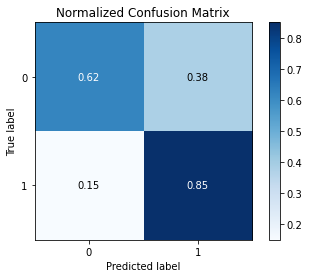

In [40]:
# final model
model_lr = LogisticRegression(C=0.001, solver='liblinear',penalty='l2', multi_class='ovr')
model_lr.fit(X_train_rus, y_train_rus)

# making prediction
X_test = scaler.transform(X_test) #padronizar somente na fase final da previsão
y_pred_model_lr = model_lr.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred_model_lr))

# Printing AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_model_lr)))

# Plot confusion matrix
model_lr_corr = plot_confusion_matrix(y_test, y_pred_model_lr, normalize=True)
plt.show()

### **SVM**

As can be seen below it not presented any improvement after tuned, keeping Recall similar **0.78** to **0.77**. We will try to deepen and improve our tunning parameter at an opportune moment in the future. :)

In [41]:
# get params
print(svc.get_params().keys())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


In [46]:
svc = SVC()

param_grid = {'C' :  [0.001, 0.01, 1, 10, 100] ,
}

# Checking for the best parameter
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(svc, param_grid, scoring="recall", cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Best Recall: {} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best Recall: 0.7974316109422491 for {'C': 0.01}


In [47]:
svc = SVC(C=0.01)

param_grid = {'kernel' :  ['linear', 'poly', 'rbf', 'sigmoid'] 
}

# Checking for the best parameter
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(svc, param_grid, scoring="recall", cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Best Recall: {} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best Recall: 0.9379584599797365 for {'kernel': 'poly'}


              precision    recall  f1-score   support

           0       0.89      0.65      0.75      1294
           1       0.44      0.77      0.56       467

    accuracy                           0.68      1761
   macro avg       0.66      0.71      0.65      1761
weighted avg       0.77      0.68      0.70      1761

AUC: 0.7092



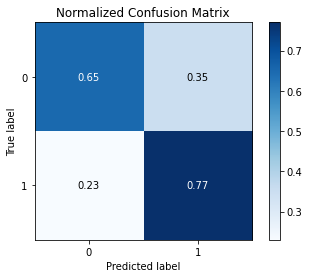

In [48]:
# final model
model_svm = SVC(kernel='poly', C= 0.01)
model_svm.fit(X_train_rus, y_train_rus)

# making prediction
X_test = scaler.transform(X_test) 
y_pred_model_svm = model_svm.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred_model_svm))

# Printing AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_model_svm)))

# Plot Confusion matrix
plot_confusion_matrix(y_test, y_pred_model_svm, normalize=True)
plt.show()

**Comparing XGB, LR and SVM Model**

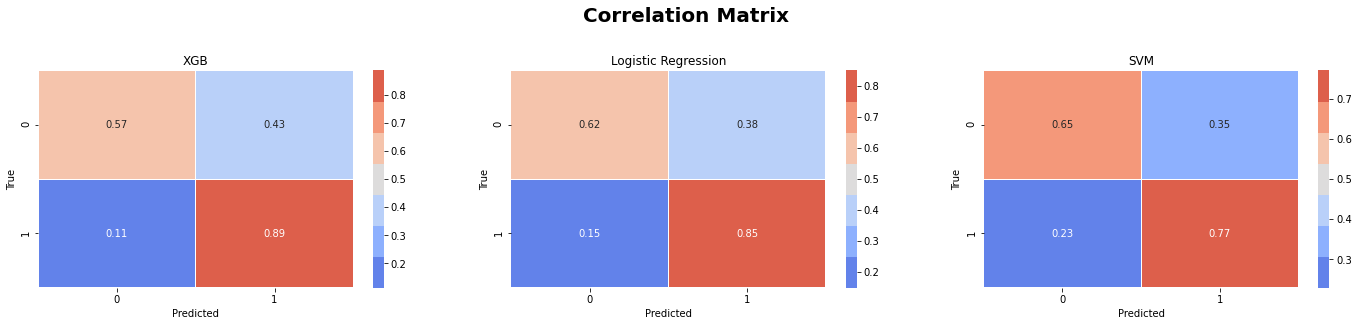

In [49]:
palette = sns.color_palette("coolwarm", 7)

xgb_corr = confusion_matrix(y_test, y_pred_model_xgb, normalize='true')
lr_corr = confusion_matrix(y_test, y_pred_model_lr, normalize='true')
svm_corr = confusion_matrix(y_test, y_pred_model_svm, normalize='true')

f, ax = plt.subplots(nrows=1, ncols=3, figsize = (24,4))
f.suptitle('Correlation Matrix',fontsize=20,fontweight='bold',y=1.1)

sns.heatmap(xgb_corr, annot=True, linewidths=.1, cmap=palette, ax=ax[0])
ax[0].set_title('XGB')
ax[0].set_ylabel('True')
ax[0].set_xlabel('Predicted')

sns.heatmap(lr_corr, annot=True, linewidths=.1, cmap=palette, ax=ax[1])
ax[1].set_title('Logistic Regression')
ax[1].set_ylabel('True')
ax[1].set_xlabel('Predicted')

sns.heatmap(svm_corr, annot=True, linewidths=.1, cmap=palette, ax=ax[2])
ax[2].set_title('SVM')
ax[2].set_ylabel('True')
ax[2].set_xlabel('Predicted')


plt.show()

# **Conclusion**

No algorithm will detect churn with 100% accuracy. There will always be a trade-off between the precision metric and the recall metric. That's why it's important to test and have a deep understanding of the business, the data, and the strengths and weaknesses of each classifier to get the best out of each one. 

I will choose the **XGB model** because the Recall is better than other tested models, with **0.89** and despite the precision is **0.43**
a little bigger than more than the Logistic Regression. It is acceptable to engage and offers something with those who are mistakenly tagged as ‘not churned,’ as it does not cause any negative impact on the brand.

**Helpful informations:**

* [Seaborn Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [Churn Prediction Article - Towards DS](https://towardsdatascience.com/churn-prediction-3a4a36c2129a)
* [The begginer image Source](https://www.sogeti.com/why-us/proven-expertise/swedish-telecommunication-company/)
* [BoxPlot Image Source](https://codingwithmax.com/box-plot-python/)
* [XGBoost Datacamp Tutorial](https://www.datacamp.com/community/tutorials/xgboost-in-python)
* [Tuning XGBoost Article - Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
* [Tuning XGBoost Article - Towards DS](https://towardsdatascience.com/doing-xgboost-hyper-parameter-tuning-the-smart-way-part-1-of-2-f6d255a45dde)

